In [ ]:
!pip install kaggle

In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# dataset api
!kaggle competitions download -c cifar-10

100% 715M/715M [00:33<00:00, 29.4MB/s]
100% 715M/715M [00:33<00:00, 22.4MB/s]


In [ ]:
!ls

cifar-10.zip  kaggle.json  sample_data


In [ ]:
# extracting the compressed dataset
from zipfile import ZipFile
dataset = '/content/cifar-10.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!ls

cifar-10.zip  kaggle.json  sample_data	sampleSubmission.csv  test.7z  train.7z  trainLabels.csv


In [ ]:
!pip install py7zr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.6/67.6 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 411.2/411.2 kB 38.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.9/138.9 kB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 50.0 MB/s eta 0:00:00


In [ ]:
import py7zr

archive = py7zr.SevenZipFile('/content/train.7z', mode='r')
archive.extractall()
archive.close()

In [ ]:
!ls

cifar-10.zip  sample_data	    test.7z  train.7z
kaggle.json   sampleSubmission.csv  train    trainLabels.csv


Importing the Dependencies

In [ ]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [ ]:
filenames = os.listdir('/content/train')

In [ ]:
type(filenames)

list

In [ ]:
len(filenames)

50000

In [ ]:
print(filenames[0:5])
print(filenames[-5:])

['46421.png', '31506.png', '35844.png', '17111.png', '13033.png']
['3399.png', '47640.png', '22373.png', '571.png', '43538.png']


Labels Processing

In [ ]:
labels_df = pd.read_csv('/content/trainLabels.csv')

In [ ]:
labels_df.shape

(50000, 2)

In [ ]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [ ]:
labels_df['label'].value_counts()

label
frog          5000
truck         5000
deer          5000
automobile    5000
bird          5000
horse         5000
ship          5000
cat           5000
dog           5000
airplane      5000
Name: count, dtype: int64

In [ ]:
labels_dict = {'airplane':0, 'automobile':1, 'bird':2,'cat':3, 'deer':4, 'dog':5, 'frog':6,'horse':7,'ship':8,'truck':9}

labels = [labels_dict[i] for i in labels_df['label']]

In [ ]:
print(labels[0:5])
print(labels[-5:])

[6, 9, 9, 4, 1]
[2, 6, 9, 1, 1]


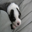

In [ ]:
# displaying the sample image
import cv2
from google.colab.patches import cv2_imshow

img= cv2.imread('/content/train/45888.png')
cv2_imshow(img)

In [ ]:
labels_df[labels_df['id'] == 45888]

,id,label
45887,45888,dog


In [ ]:
id_list = list(labels_df['id'])

In [ ]:
print(id_list[0:5])
print(id_list[-5:])

[1, 2, 3, 4, 5]
[49996, 49997, 49998, 49999, 50000]


**Image Processing**

In [ ]:
# convert images to numpy arrays

train_data_folder = '/content/train/'

data = []

for id in id_list:
  image = Image.open(train_data_folder + str(id) + '.png')
  image = np.array(image)
  data.append(image)

In [ ]:
type(data)

list

In [ ]:
len(data)

50000

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(32, 32, 3)

In [ ]:
# convert images list and labels list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
print(X.shape,
      Y.shape)

(50000, 32, 32, 3) (50000,)


**Train Test Split**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape,X_train.shape, X_test.shape)

(50000, 32, 32, 3) (40000, 32, 32, 3) (10000, 32, 32, 3)


In [ ]:
# scaling the data
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [ ]:
X_train_scaled

array([[[[0.81960784, 0.82352941, 0.79607843],
         [0.83529412, 0.83921569, 0.81960784],
         [0.85490196, 0.85882353, 0.84313725],
         ...,
         [0.49803922, 0.29019608, 0.15294118],
         [0.47843137, 0.26666667, 0.1372549 ],
         [0.45490196, 0.24705882, 0.1254902 ]],

        [[0.82352941, 0.82352941, 0.79215686],
         [0.83529412, 0.83921569, 0.81176471],
         [0.85490196, 0.8627451 , 0.83921569],
         ...,
         [0.48627451, 0.2745098 , 0.1372549 ],
         [0.4745098 , 0.2627451 , 0.12941176],
         [0.48235294, 0.27058824, 0.14117647]],

        [[0.80784314, 0.80392157, 0.76470588],
         [0.81960784, 0.81960784, 0.79215686],
         [0.83529412, 0.84313725, 0.81960784],
         ...,
         [0.48627451, 0.2745098 , 0.14509804],
         [0.51372549, 0.30196078, 0.16470588],
         [0.51372549, 0.30588235, 0.16078431]],

        ...,

        [[0.49803922, 0.42352941, 0.38039216],
         [0.54117647, 0.47843137, 0.43137255]

**Building the Neural Network**

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes = 10

# setting up the layers of Neural Network

model = keras.Sequential([

                          keras.layers.Flatten(input_shape=(32,32,3)),
                          keras.layers.Dense(64, activation='relu'),
                          keras.layers.Dense(num_of_classes,activation='softmax')

])

In [ ]:
# compile the Neural Network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
#training the Neural Network
model.fit(X_train_scaled,Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 [==============================] - 7s 4ms/step - loss: 1.9692 - acc: 0.2787 - val_loss: 1.9163 - val_acc: 0.2837
Epoch 2/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.8480 - acc: 0.3318 - val_loss: 1.8150 - val_acc: 0.3335
Epoch 3/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.8160 - acc: 0.3437 - val_loss: 1.8095 - val_acc: 0.3417
Epoch 4/10
1125/1125 [==============================] - 5s 4ms/step - loss: 1.7964 - acc: 0.3496 - val_loss: 1.7673 - val_acc: 0.3557
Epoch 5/10
1125/1125 [==============================] - 5s 4ms/step - loss: 1.7854 - acc: 0.3542 - val_loss: 1.7785 - val_acc: 0.3475
Epoch 6/10
1125/1125 [==============================] - 4s 4ms/step - loss: 1.7787 - acc: 0.3576 - val_loss: 1.7508 - val_acc: 0.3623
Epoch 7/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.7649 - acc: 0.3642 - val_loss: 1.7427 - val_acc: 0.3688
Epoch 8/10
1125/1125 [==============================] - 3s 3ms

**ResNet50**

In [ ]:
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [ ]:
convolutional_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256,256,3))
convolutional_base.summary()

94765736/94765736 [==============================] - 4s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 262, 262, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 128, 128, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 128, 128, 64)         256       ['conv1_conv[0][0]']          
 on)                      

In [ ]:
num_of_classes = 10

model = models.Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(convolutional_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(num_of_classes,activation='softmax'))

In [ ]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [ ]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 [==============================] - 495s 403ms/step - loss: 1.6578 - acc: 0.4482 - val_loss: 0.8881 - val_acc: 0.7513
Epoch 2/10
1125/1125 [==============================] - 450s 400ms/step - loss: 1.0042 - acc: 0.6993 - val_loss: 0.4639 - val_acc: 0.8978
Epoch 3/10
1125/1125 [==============================] - 444s 394ms/step - loss: 0.7475 - acc: 0.8034 - val_loss: 0.3504 - val_acc: 0.9155
Epoch 4/10
1125/1125 [==============================] - 450s 400ms/step - loss: 0.5773 - acc: 0.8663 - val_loss: 0.2844 - val_acc: 0.9333
Epoch 5/10
1125/1125 [==============================] - 450s 400ms/step - loss: 0.4500 - acc: 0.9063 - val_loss: 0.2496 - val_acc: 0.9362
Epoch 6/10
1125/1125 [==============================] - 444s 394ms/step - loss: 0.3534 - acc: 0.9342 - val_loss: 0.2413 - val_acc: 0.9367
Epoch 7/10
1125/1125 [==============================] - 450s 400ms/step - loss: 0.2899 - acc: 0.9502 - val_loss: 0.2335 - val_acc: 0.9342
Epoch 8/10
1125/1125 [============

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled,Y_test)
print('Test Accuracy =', accuracy)

313/313 [==============================] - 40s 121ms/step - loss: 0.2306 - acc: 0.9378
Test Accuracy = 0.9377999901771545


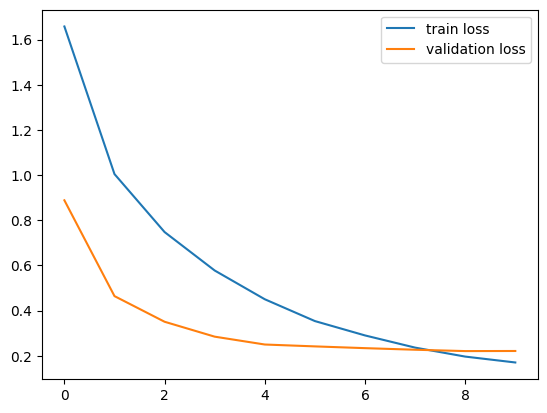

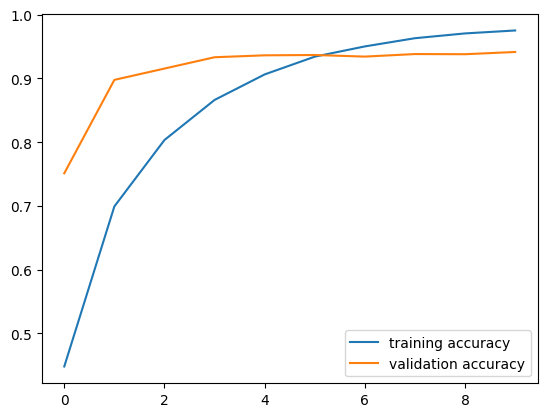

In [ ]:
h = history

# plot the loss function value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='training accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Buidling a Predictive System**

Path of the image to be predicted: /content/Frog.jpg


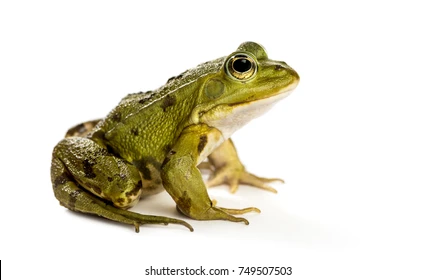

1/1 [==============================] - 0s 26ms/step
[[0.0384623  0.01041418 0.00854341 0.0287798  0.00340802 0.01464592
  0.8743509  0.00624129 0.00635449 0.00879971]]
6
Predicted class: frog


In [67]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (32,32))

input_image_scaled = input_image_resize/225

image_reshaped = np.reshape(input_image_scaled, [1,32,32,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

# Dictionary mapping numeric labels to class names
class_mapping = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck'
}

# Map the predicted label to its corresponding class name using the class_mapping dictionary
predicted_class_name = class_mapping.get(input_pred_label)

# Print the predicted class name
if predicted_class_name is not None:
    print("Predicted class:", predicted_class_name)
else:
    print("Invalid predicted label:", input_pred_label)